<a href="https://colab.research.google.com/github/Musalinux/MLOps-Credit-card-fraud-detection-system/blob/main/MLOps_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **✅ Step 1: Install Required Libraries & Setup Environment**

In [ ]:
!pip install pandas numpy scikit-learn xgboost seaborn matplotlib imbalanced-learn

## **✅ Step 2: Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib  # For saving the trained model

## **✅ Step 3: Load Dataset from Kaggle**

- Go to Kaggle > Account API > Create New API Token
- Download the kaggle.json file
- Upload it to Google Colab using:

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"musaddikvasaikar","key":"3cc4ea406f2c47b76bc78c916909ef38"}'}

Download Dataset from Kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 99% 65.0M/66.0M [00:02<00:00, 41.2MB/s]
100% 66.0M/66.0M [00:02<00:00, 28.4MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


Load the Dataset into a DataFrame

In [ ]:
df = pd.read_csv("creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## **✅ Step 4: Exploratory Data Analysis (EDA)**

1. Check for missing values:

In [ ]:
print(df.isnull().sum())  # No missing values expected

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


2. Check class imbalance:


<ipython-input-7-7fab20596ba2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


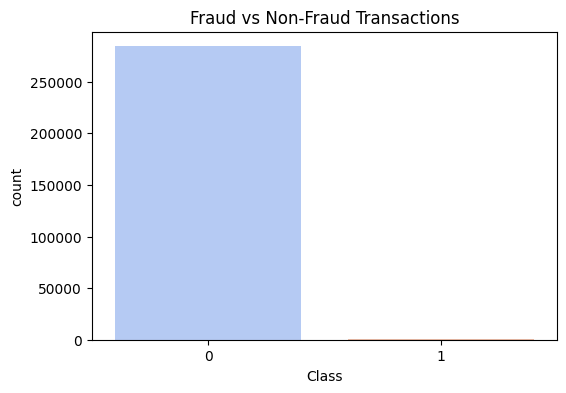

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

Since fraud cases are rare, we apply SMOTE to balance the dataset.

## **✅ Step 5: Preprocess Data**

1. Split Features & Labels

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

2. Apply Feature Scaling (Standardization)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Apply SMOTE to Balance Data

In [ ]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

4. Split into Training & Testing Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## **✅ Step 6: Train the Machine Learning Model**

1. Using Random Forest (best for fraud detection tasks)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **✅ Step 7: Evaluate Model Performance**

In [ ]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295

Confusion Matrix:
 [[56763    14]
 [    2 28516]]
ROC AUC Score: 0.9998416450672509


## **✅ Step 8: Save Model for Deployment**

In [ ]:
joblib.dump(model, "fraud_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

Download the model locally

In [ ]:
from google.colab import files
files.download("fraud_detection_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅ Next Steps:

1. Deploy to AWS (Lambda + API Gateway)
Upload fraud_detection_model.pkl and scaler.pkl to AWS S3.
2. Create an AWS Lambda function to load the model and process fraud detection requests.
3. Set up an API Gateway to allow real-time fraud detection via API.